In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
   
import warnings
warnings.filterwarnings('ignore')
   
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
   
import os
import matplotlib.image as mpimg

In [3]:
project_path = r"C:\Users\shaik\Downloads\archive (2)"
train_path =  r"C:\Users\shaik\Downloads\archive (2)\chest_xray\train"
val_path =  r"C:\Users\shaik\Downloads\archive (2)\chest_xray\chest_xray\val"
test_path =  r"C:\Users\shaik\Downloads\archive (2)\chest_xray\test" 

In [15]:
Train = keras.utils.image_dataset_from_directory(
	directory=r"C:\Users\shaik\Downloads\archive (2)\chest_xray\train",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory=r"C:\Users\shaik\Downloads\archive (2)\chest_xray\test",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory=r"C:\Users\shaik\Downloads\archive (2)\chest_xray\chest_xray\val",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [33]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    
    layers.Dense(2, activation='sigmoid')  # For binary classification
])


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,784,066 (25.88 MB)

 Trainable params: 6,782,018 (25.87 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [37]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(
    Train,
    epochs=10,
    validation_data=Validation
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.9828 - loss: 0.0456 - val_accuracy: 0.5000 - val_loss: 3.1164
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9866 - loss: 0.0389 - val_accuracy: 0.5000 - val_loss: 11.4380
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9816 - loss: 0.0530 - val_accuracy: 0.8125 - val_loss: 0.3901
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9375 - val_loss: 0.1323
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9907 - loss: 0.0272 - val_accuracy: 0.5000 - val_loss: 5.3492
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.5625 - val_loss: 2.9736
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9923 - loss: 0.0222 - val_accuracy: 0.7500 - val_loss: 0.4832
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9935 - loss: 0.0190 - val_acc

In [75]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
      np.round(accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.8123 - loss: 0.7068
The accuracy of the model on test dataset is 80.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Pneumonia


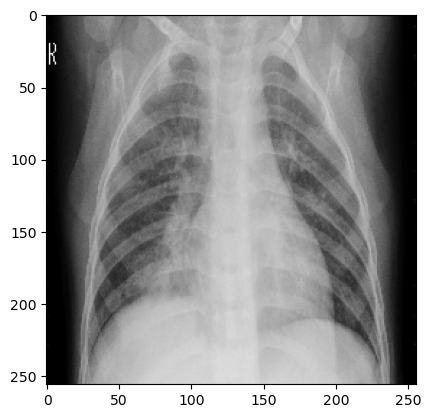

In [83]:
test_image = tf.keras.utils.load_img(
    r"C:\Users\shaik\Downloads\archive (2)\chest_xray\train\PNEUMONIA\person991_virus_1669.jpeg",
    target_size=(256, 256))

plt.imshow(test_image)


test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)


result = model.predict(test_image)

class_probabilities = result[0]


if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
